# Task: Kaggle Text Sentiment Analysis

# 1. Data Collection:
 - Instruct students to select a suitable dataset from Kaggle that contains text data along with sentiment labels.
 - Ensure that the chosen dataset aligns with the task's objectiv

In [47]:
import numpy as np 
import pandas as pd

In [43]:
df=pd.read_excel("test.xlsx")

# 2. Data Cleaning and Preprocessing:
 - Guide them in cleaning the text data, which may include removing special characters, handling missing values, and lowercasing the text.
 - Instruct them to tokenize the text and remove stop words.
 - Encourage the exploration of techniques like stemming or lemmatization.

In [44]:
import re

def clean_text(text):
    # Remove special characters and extra spaces
    cleaned_text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    cleaned_text = re.sub('\s+', ' ', cleaned_text).strip()
    return cleaned_text

# Assuming you have a DataFrame 'df' with a 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Handling missing values
df['cleaned_text'].fillna('', inplace=True)


In [45]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    return filtered_words

df['tokenized_text'] = df['cleaned_text'].apply(tokenize_and_remove_stopwords)


[nltk_data] Downloading package punkt to C:\Users\Hania
[nltk_data]     Fatima\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Hania
[nltk_data]     Fatima\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [46]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_words(tokens):
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized

df['lemmatized_text'] = df['tokenized_text'].apply(lemmatize_words)


[nltk_data] Downloading package wordnet to C:\Users\Hania
[nltk_data]     Fatima\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 3. Exploratory Data Analysis (EDA):
 - Ask them to perform EDA to gain insights into the dataset. This may include visualizations of word frequency, sentiment distribution, and word clouds

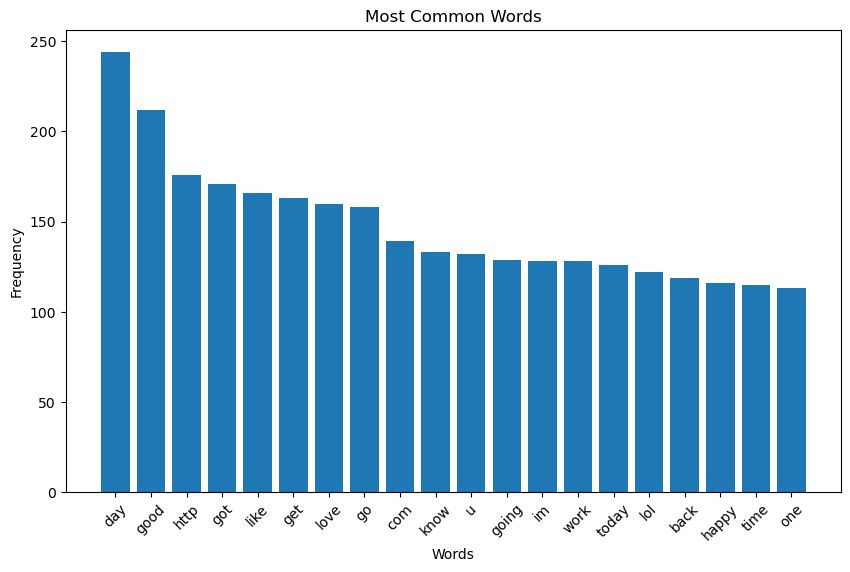

In [48]:
from collections import Counter
import matplotlib.pyplot as plt

# Combine all tokenized words into a single list
all_tokens = [word for tokens in df['tokenized_text'] for word in tokens]

# Calculate word frequencies
word_freq = Counter(all_tokens)

# Plot the most common words
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words')
plt.show()


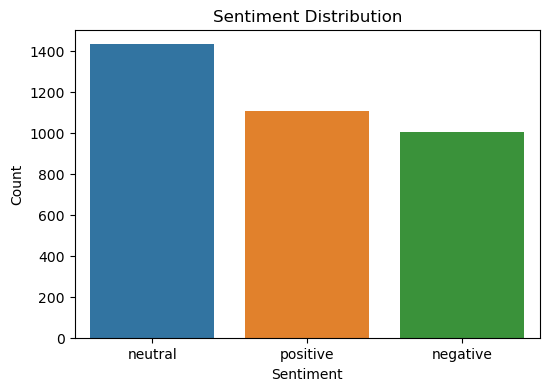

In [49]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


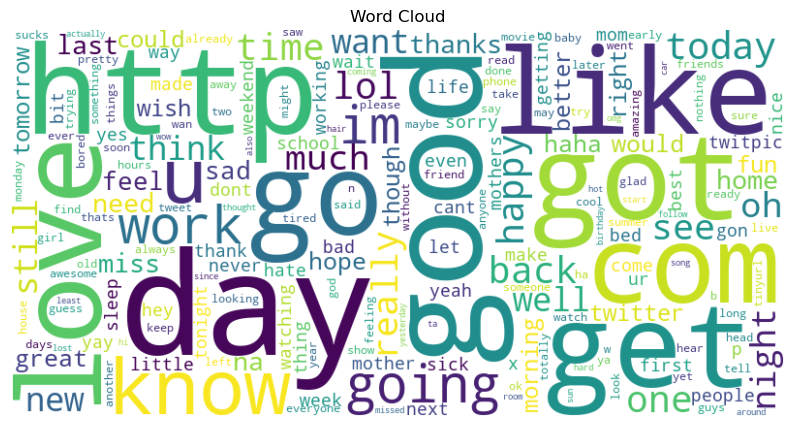

In [50]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


# 4.Feature Engineering:
 - Help them create relevant features from the text data, such as TF-IDF (Term Frequency-Inverse Document Frequency) vectors or word embeddings.

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_text'].apply(' '.join))

# Convert the sparse matrix to a dense array
tfidf_features = tfidf_matrix.toarray()


In [56]:
# Load pre-trained Word2Vec embeddings (example)
from gensim.models import Word2Vec

# Train Word2Vec embeddings on your tokenized text data (you can use your own data)
w2v_model = Word2Vec(sentences=df['tokenized_text'], vector_size=100, window=5, min_count=1, sg=0)

# Create average Word2Vec vectors for each document
def document_vector(tokens, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    num_words = 0
    for word in tokens:
        if word in model.wv:
            num_words += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if num_words > 0:
        feature_vector = np.divide(feature_vector, num_words)
    return feature_vector

df['word2vec_vector'] = df['tokenized_text'].apply(lambda x: document_vector(x, w2v_model, 100))

# You can use the 'word2vec_vector' column as features for your machine learning models

# 5. Model Selection:
 - Allow them to choose machine learning models (e.g., logistic regression, support vector machines) or deep learning models (e.g., recurrent neural networks, transformers) for sentiment analysis

Support Vector Machines (SVM) is selected

# 6. Model Training and Evaluation:
 - Split the dataset into training and testing sets.
 - Train the selected model(s) on the training data and evaluate its performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score).
 - Stress the importance of cross-validation to ensure robust model performance.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have the TF-IDF features in 'tfidf_features' and sentiment labels in 'sentiment' column
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['sentiment'], test_size=0.2, random_state=42)


from sklearn.svm import SVC

# Create an SVM model
svm_model = SVC()

# Fit the model
svm_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.6294200848656294
